## <font color='darkblue'>Preface</font>
([article source](https://towardsdatascience.com/practical-machine-learning-tutorial-part-1-data-exploratory-analysis-c13d39b8f33b) and [corresponding notebook](https://github.com/mardani72/Practical_ML_Tutorial_Facies_examp/blob/main/Part1_practical_Tut_ML_facies.ipynb)) **Although there are tons of great books and papers outside to practice machine learning, I always wanted to see something short, simple, and with a descriptive manuscript.** I always wanted to see an example with an appropriate explanation of the procedure accompanied by detailed results interpretation. Model evaluation metrics should also need to be elaborated clearly.

**In this work, I will try to include all important steps of ML modeling** (<font color='brown'>even though some are not necessary for this dataset</font>) **to make a consistent and tangible example, especially for geoscientists.** Eight important ML algorithms will be examined and results will be compared. I will try to have an argumentative model evaluation discussion. I will not go deep into the algorithm’s fundamentals.

To access the dataset and jupyter notebook find out my [Git](https://github.com/mardani72/Practical_ML_Tutorial_Facies_examp).
* **Note1:** codes embedded in this manuscript are presented to understand the work procedure. If you want to exercise by yourself, I highly recommend using the [jupyter notebook file](https://github.com/mardani72/Practical_ML_Tutorial_Facies_examp/blob/main/Part1_practical_Tut_ML_facies.ipynb).
* **Note2:** shuffling data can cause differences between your runs and what appears here.

### <font color='darkgreen'>Agenda</font>
This tutorial has four parts:
* <font size='3ptx'>[**Exploratory Data Analysis**](#sect1)</font>
    * [**Data visualization**](#sect1_1)
    * [**Feature Engineering**](#sect1_2)
    * [**Baseline Model Performance**](#sect1_3)
    * [**Oversampling**](#sect1_4)
    * [**Feature Importance**](#sect1_5)
    * [**Permutation feature importance**](#sect1_6)
* Build Model & Validate
* Model Evaluation-1
* Model Evaluation-2

### <font color='darkgreen'>Data Summary</font>
The dataset ([facies_vectors.csv](https://github.com/mardani72/Practical_ML_Tutorial_Facies_examp/blob/main/facies_vectors.csv))for this study comes from Hugoton and Panoma Fields in North America which was used as class exercise at The University of Kansas (Dubois et. al, 2007). It consists of log data(the measurement of physical properties of rocks) of nine wells. We will use these log data to train supervised classifiers in order to predict discrete facies groups. For more detail, you may take a look here. The seven features are:
* **GR:** this wireline logging tools measure gamma emission
* **ILD_log10:** this is resistivity measurement
* **PE:** photoelectric effect log
* **DeltaPHI:** Phi is a porosity index in petrophysics.
* **PNHIND:** Average of neutron and density log.
* **NM_M:** nonmarine-marine indicator
* **RELPOS:** relative position

The nine discrete facies (classes of rocks) are:
* (SS) Nonmarine sandstone
* (CSiS) Nonmarine coarse siltstone
* (FSiS) Nonmarine fine siltstone
* (SiSH) Marine siltstone and shale
* (MS) Mudstone (limestone)
* (WS) Wackestone (limestone)
* (D) Dolomite
* (PS) Packstone-grainstone (limestone)
* (BS) Phylloid-algal bafflestone (limestone)

<a id='sect1'></a>
## <font color='darkblue'>Exploratory Data Analysis</font>
After data reading into python using Pandas, we can visualize it to understand data better. Before plotting, we need to define a color map (<font color='brown'>this step deserves to be in the Feature engineering part but we need here to plot color for facies classes</font>) and devote color code for each facies.

<a id='sect1_1'></a>
### <font color='darkgreen'>Data visualization</font>

In [1]:
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

pd.set_option('display.max_rows', 30)

In [2]:
df = pd.read_csv('../../datas/facies_vectors.csv')

In [3]:
# specify some data types may python concern about
df['Facies'] = df['Facies'].astype('int')
df['Depth'] = df['Depth'].astype('float')
df['Well Name'] = df['Well Name'].astype('category')
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [4]:
# colors 
facies_colors = [
    'xkcd:goldenrod', 'xkcd:orange','xkcd:sienna','xkcd:violet',
    'xkcd:olive','xkcd:turquoise', "xkcd:yellowgreen", 'xkcd:indigo', 'xkcd:blue'
]

facies_labels = [
    'SS', 'CSiS', 'FSiS', 'SiSh', 
    'MS',  'WS', 'D','PS', 'BS'
]

# Fies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]

#establish facies label str    
df.loc[:,'FaciesLabels'] = df.apply(lambda row: label_facies(row, facies_labels), axis=1)
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS


This is function to create a plot.

In [5]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g',  alpha=0.8, lw = 0.9)
    ax[1].plot(logs.ILD_log10, logs.Depth, '-b',  alpha=0.8, lw = 0.9)
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-k',  alpha=0.8, lw = 0.9)
    ax[3].plot(logs.PHIND, logs.Depth, '-r',  alpha=0.8, lw = 0.9)
    ax[4].plot(logs.PE, logs.Depth, '-c',  alpha=0.8, lw = 0.9)
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

In [6]:
df['Well Name'].unique()

[SHRIMPLIN, ALEXANDER D, SHANKLE, LUKE G U, KIMZEY A, CROSS H CATTLE, NOLAN, Recruit F9, NEWBY, CHURCHMAN BIBLE]
Categories (10, object): [SHRIMPLIN, ALEXANDER D, SHANKLE, LUKE G U, ..., NOLAN, Recruit F9, NEWBY, CHURCHMAN BIBLE]

And the plot of the well SHRIMPLIN:

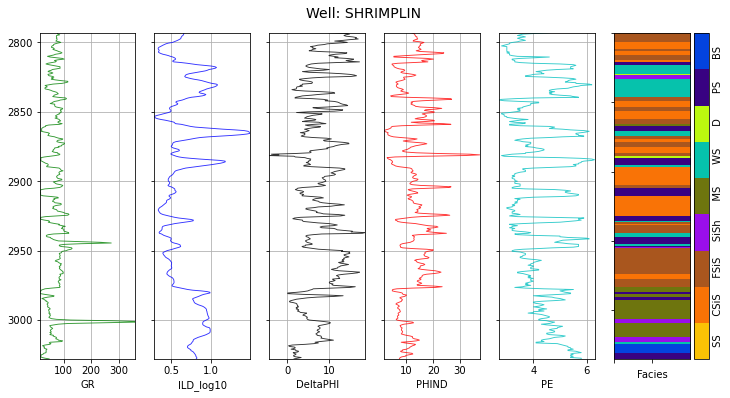

In [7]:
data = df
make_facies_log_plot(
    data[data['Well Name'] == 'SHRIMPLIN'],
    facies_colors)

We can use the Counter function to evaluate each class contribution quantitatively. **To see facies frequency distribution we can use a bar plot as:**

In [8]:
cn = Counter(data.FaciesLabels)
for i,j in cn.items():
    percent = j / len(data) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (i, j, percent))

Class=FSiS, Count=780, Percentage=18.800%
Class=CSiS, Count=940, Percentage=22.656%
Class=PS, Count=686, Percentage=16.534%
Class=WS, Count=582, Percentage=14.027%
Class=D, Count=141, Percentage=3.398%
Class=SiSh, Count=271, Percentage=6.532%
Class=MS, Count=296, Percentage=7.134%
Class=BS, Count=185, Percentage=4.459%
Class=SS, Count=268, Percentage=6.459%


Text(0, 0.5, 'Frequency')

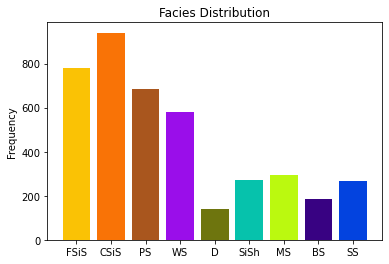

In [9]:
plt.bar(cn.keys(), cn.values(), color=facies_colors )
plt.title('Facies Distribution')
plt.ylabel('Frequency')
# plt.savefig("bar_plot.png", dpi=400)

**<font color='darkred'>This is an imbalanced dataset</font>**. `Dolomite` has the lowest member participation. Comparing coarse siltstone, dolomite appears 8 times less than that.

To visualize multiple pairwise bivariate distributions in a dataset, we may use the [pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function from the [**Seaborn library**](https://seaborn.pydata.org/index.html).

 It shows the relationship for the combination of variables in the dataset in the matrix format with a univariate distribution plot in diagonal. It is clear that `PE` log has a non-linear relationship with average porosity. Other pairs do not show a clear pattern. The distribution pattern in diagonal shows that each label class (<font color='brown'>facies</font>) with respect to each feature has acceptable separation although there is a strong overlap for various classes. The ideal pattern can be assumed as a clear separation of distribution plots in tall bell shape normal distribution graph.

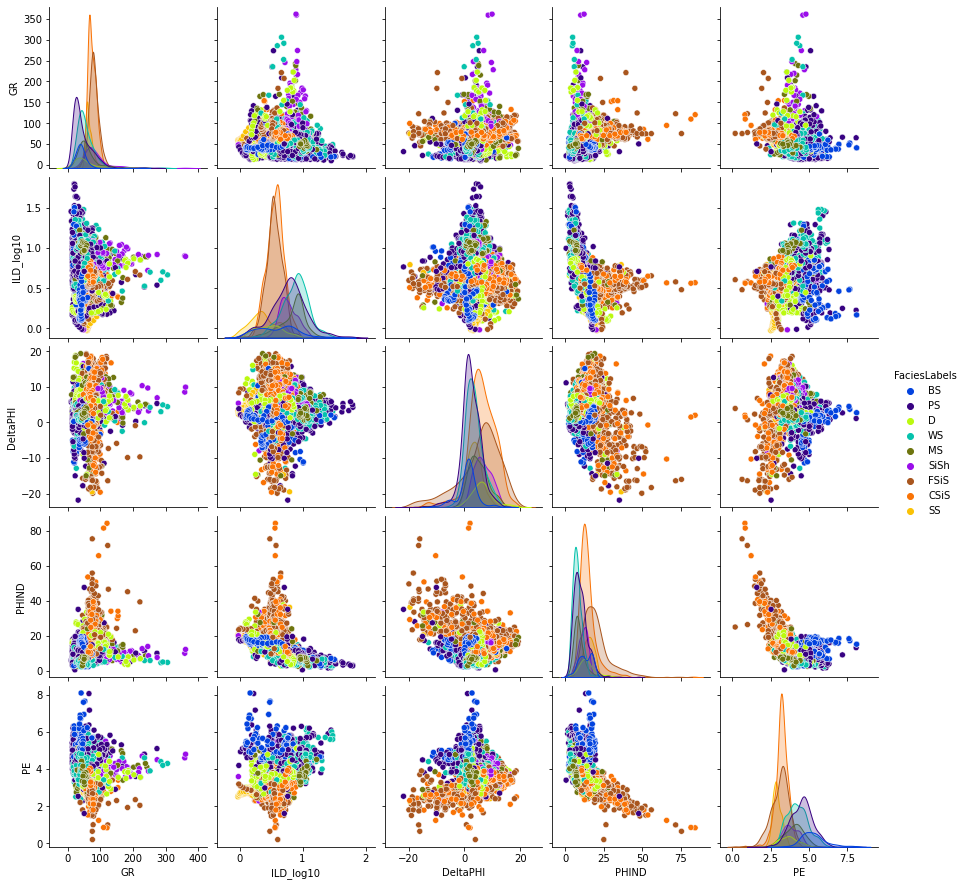

In [10]:
sns_plot = sns.pairplot(data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))
sns_plot.savefig('cross_plots.png')

Highlight: Collinear features are features that are highly correlated with each other. In machine learning, these lead to decreased generalization performance on the test set due to high variance and less model interpretability. In this dataset, we are not facing with collinearity. Using [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) command:

In [11]:
data.corr()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,0.306688,-0.386677,0.383166,-0.235005,-0.356453,0.704231,0.852721,0.076761
Depth,0.306688,1.000000,-0.088636,0.202272,0.067694,-0.095834,0.277577,0.282318,0.001537
GR,-0.386677,-0.088636,1.000000,-0.205855,0.178863,0.270729,-0.289023,-0.316284,-0.182051
ILD_log10,0.383166,0.202272,-0.205855,1.000000,-0.104827,-0.544416,0.384589,0.493570,0.088227
DeltaPHI,-0.235005,0.067694,0.178863,-0.104827,1.000000,-0.189355,0.011489,-0.177500,0.022470
PHIND,-0.356453,-0.095834,0.270729,-0.544416,-0.189355,1.000000,-0.573418,-0.481024,-0.033328
PE,0.704231,0.277577,-0.289023,0.384589,0.011489,-0.573418,1.000000,0.657089,0.018905
NM_M,0.852721,0.282318,-0.316284,0.493570,-0.177500,-0.481024,0.657089,1.000000,0.034015
RELPOS,0.076761,0.001537,-0.182051,0.088227,0.022470,-0.033328,0.018905,0.034015,1.000000


If you want to learn more about collinerity, check this post ["Multicollinearity — How does it create a problem?"](https://towardsdatascience.com/https-towardsdatascience-com-multicollinearity-how-does-it-create-a-problem-72956a49058)

<a id='sect1_2'></a>
### <font color='darkgreen'>Feature Engineering</font>
It is common to have missing value in the dataset. **To see the sum of null values for each column of features**:

In [12]:
data.isna().sum()

Facies            0
Formation         0
Well Name         0
Depth             0
GR                0
ILD_log10         0
DeltaPHI          0
PHIND             0
PE              917
NM_M              0
RELPOS            0
FaciesLabels      0
dtype: int64

Here, PE has 917 null values.

There are several ways to deal with Null values in the dataset. The simplest approach is to drop the rows containing at least one null value. This can be logical with a bigger size dataset but in small data frames, single points are important. We can **impute null values with mean or from adjacent data points in columns. Filling with mean value will not affect data variance and therefore will not have an impact on prediction accuracy, though can create data bias. Filling with the neighbor cells of column values can be appropriate if we have a geologically homogeneous medium like mass pure carbonate rocks.**

**Another approach, that I will implement here, to employe machine learning models to predict missing values. This is the best way of dealing with this dataset because we have just a single feature missing from the dataset, `PE`.** On the other hand, filling with ML prediction is much better than the single mean value because we are able to see ML correlation and accuracy by dividing data to train and test sets.

Here, I will employ the [**Multi-Layer Perceptron Neural Network from scikit-learn**](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to predict target value. I am not going to deep for this approach and use simply to predict missing values.

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [14]:
data_fe = data
set_PE = data_fe[
    [
        'Facies','Depth', 'GR', 'ILD_log10',
        'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'
    ]
].dropna()  # Select features and target log that has value

X = set_PE[
    [
        'Facies','Depth', 'GR', 'ILD_log10',
        'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS'
    ]
]  # feature selection without null value

XX = data_fe[
    [
        'Facies','Depth', 'GR', 'ILD_log10',
        'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS'
    ]
]

y = set_PE['PE'] # target log

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_b = scaler.fit_transform(XX)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
%%time
MLP_pe = MLPRegressor(random_state=1, max_iter= 500).fit(X_train, y_train) #fit the model

Wall time: 9.21 s


c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
MLP_pe.score(X_test, y_test) # examine accuracy

0.776094801295609

In [17]:
data_fe['PE_pred'] = MLP_pe.predict(X_b)  # predict PE
data_fe_is_na = data_fe['PE'].isna()
data_fe[data_fe_is_na]

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,PE_pred
471,3,A1 SH,ALEXANDER D,2887.5,88.710,0.612,6.700,10.6050,NaN,1,1.000,FSiS,3.527340
472,3,A1 SH,ALEXANDER D,2888.0,92.710,0.583,11.000,12.5150,NaN,1,0.974,FSiS,3.637907
473,3,A1 SH,ALEXANDER D,2888.5,94.540,0.579,12.000,13.4100,NaN,1,0.949,FSiS,3.643103
474,3,A1 SH,ALEXANDER D,2889.0,95.310,0.579,11.500,13.7500,NaN,1,0.923,FSiS,3.590323
475,3,A1 SH,ALEXANDER D,2889.5,93.790,0.572,10.300,13.4050,NaN,1,0.897,FSiS,3.516658
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,9,C LM,Recruit F9,3129.5,19.160,1.162,2.586,7.6070,NaN,2,0.560,BS,4.798247
3228,9,C LM,Recruit F9,3130.0,20.461,1.031,2.503,8.6935,NaN,2,0.548,BS,4.893912
3229,9,C LM,Recruit F9,3130.5,23.425,0.791,4.017,9.9725,NaN,2,0.536,BS,5.238571
3230,9,C LM,Recruit F9,3131.0,31.562,0.759,5.805,9.5265,NaN,2,0.524,BS,5.056323


In [18]:
data_fe.PE.fillna(data_fe.PE_pred, inplace =True) # fill NaN vakues with predicted PE
data_fe[data_fe_is_na]

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,PE_pred
471,3,A1 SH,ALEXANDER D,2887.5,88.710,0.612,6.700,10.6050,3.527340,1,1.000,FSiS,3.527340
472,3,A1 SH,ALEXANDER D,2888.0,92.710,0.583,11.000,12.5150,3.637907,1,0.974,FSiS,3.637907
473,3,A1 SH,ALEXANDER D,2888.5,94.540,0.579,12.000,13.4100,3.643103,1,0.949,FSiS,3.643103
474,3,A1 SH,ALEXANDER D,2889.0,95.310,0.579,11.500,13.7500,3.590323,1,0.923,FSiS,3.590323
475,3,A1 SH,ALEXANDER D,2889.5,93.790,0.572,10.300,13.4050,3.516658,1,0.897,FSiS,3.516658
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,9,C LM,Recruit F9,3129.5,19.160,1.162,2.586,7.6070,4.798247,2,0.560,BS,4.798247
3228,9,C LM,Recruit F9,3130.0,20.461,1.031,2.503,8.6935,4.893912,2,0.548,BS,4.893912
3229,9,C LM,Recruit F9,3130.5,23.425,0.791,4.017,9.9725,5.238571,2,0.536,BS,5.238571
3230,9,C LM,Recruit F9,3131.0,31.562,0.759,5.805,9.5265,5.056323,2,0.524,BS,5.056323


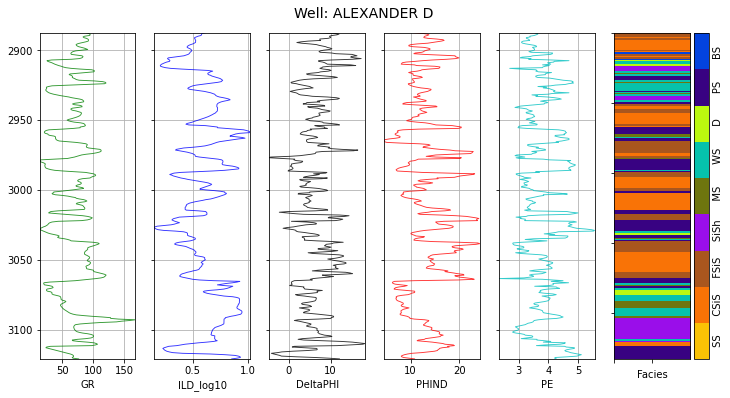

In [19]:
make_facies_log_plot(data[data['Well Name'] == 'ALEXANDER D'], facies_colors)
plt.savefig("predicted_PE.png", dpi=400)

Predicted `PE` in `Well ALEXANDER D` shows the normal range and variation. Prediction accuracy is 77%.

**Having a limited set of features in this dataset can lead us to think about extracting some data from the existing dataset.** First, we can convert the formation categorical data into numeric data. Our background knowledge can help us to guess that some facies are possibly present more in a specific formation rather than others. We can use the [**LabelEncoder**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) function:

In [20]:
# convert formation category data into numeric to use as predictor, add 1 starting from 1
data_fe['Formation_num'] = LabelEncoder().fit_transform(data_fe['Formation'].astype('str')) + 1

In [24]:
data_fe[['Formation', 'Formation_num']]

,Formation,Formation_num
0,A1 SH,2
1,A1 SH,2
2,A1 SH,2
3,A1 SH,2
4,A1 SH,2
...,...,...
4144,C LM,13
4145,C LM,13
4146,C LM,13
4147,C LM,13


We converted formation category data into numeric to use as a predictor and added 1 to start predictor from 1 instead of zero. To see if new feature extraction would assist prediction improvement, we should define a baseline model then compare it with the extracted feature model.

<a id='sect1_3'></a>
### <font color='darkgreen'>Baseline Model Performance</font>
For simplicity, we will use a logistic regression classifier as a baseline model and will examine model performance with a cross-validation concept. Data will be split into 10 subgroups and the process will be repeated 3 times.

In [25]:
from numpy import mean
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [48]:
X = data_fe[['Depth', 'GR', 'ILD_log10','DeltaPHI', 'PHIND', 'PE', 'RELPOS', 'Formation_num', 'NM_M']] # 'NM_M'
y = data_fe['Facies']

model = LogisticRegression(solver='liblinear')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f' % (mean(scores)))

Accuracy: 0.570


**Here, we can explore whether feature extraction can improve model performance**. There are many approaches while we will use some transforms for chaining the distribution of the input variables such as Quantile Transformer and KBins Discretizer. Then, will remove linear dependencies between the input variables using [**PCA**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) and [**TruncatedSVD**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html). To study more refer [here](https://machinelearningmastery.com/quantile-transforms-for-machine-learning/).

Using feature union class, we will define a list of transforms to perform results aggregated together. This will create a dataset with lots of feature columns while we need to reduce dimensionality to faster and better performance. Finally, Recursive Feature Elimination, or RFE, the technique can be used to select the most relevant features. We select 30 features.

In [49]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

#-------------------------------------------------- append transforms into a list
transforms = list()
transforms.append(('qt', QuantileTransformer(n_quantiles=100, output_distribution='normal')))
transforms.append(('kbd', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')))
transforms.append(('pca', PCA(n_components=7)))
transforms.append(('svd', TruncatedSVD(n_components=7)))
#-------------------------------------------------- initialize the feature union
fu = FeatureUnion(transforms)
#-------------------------------------------------- define the feature selection
rfe = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=30)
#-------------------------------------------------- define the model
model = LogisticRegression(solver='liblinear')
#-------------------------------------------------- use pipeline to chain operation
steps = list()
steps.append(('fu', fu))
steps.append(('rfe', rfe))
steps.append(('ml', model))
pipeline = Pipeline(steps=steps)
# define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f' % (mean(scores)))

Accuracy: 0.611
Wall time: 39 s


Accuracy improvement shows that feature extraction can be a useful approach when we are dealing with limited features in the dataset.

<a id='sect1_4'></a>
### <font color='darkgreen'>Oversampling</font>
**In imbalanced datasets, we can use the [resampling technique](https://en.wikipedia.org/wiki/Resampling_(statistics)) to add some more data points to increase members of minority groups.** This can be helpful whenever minority label targets have special importance such as credit card fraud detection. In that example, fraud can happen with less than 0.1 percent of transactions while it is important to detect fraud.

In this work, we will add pseudo observation for the `Dolomite` class which has the lowest population.

[**Synthetic Minority Oversampling Technique, SMOTE**](https://arxiv.org/pdf/1106.1813.pdf): the technique is used to select nearest neighbors in the feature space, separate examples by adding a line, and producing new examples along the line. The method is not merely generating the duplicates from the outnumbered class but applied K-nearest neighbors to generate synthetic data.

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm1 , y_sm1 = smote.fit_sample(X,y)
X_sm , y_sm = X_sm1 , y_sm1  # keep for fuuture plotting an cimparision

In [51]:
print("Before SMOTE: ", Counter(y))
print("After SMOTE: ", Counter(y_sm))

Before SMOTE:  Counter({2: 940, 3: 780, 8: 686, 6: 582, 5: 296, 4: 271, 1: 268, 9: 185, 7: 141})
After SMOTE:  Counter({3: 940, 2: 940, 8: 940, 6: 940, 7: 940, 4: 940, 5: 940, 9: 940, 1: 940})


In [52]:
scaler = StandardScaler()
X_sm = scaler.fit_transform(X_sm)

In [53]:
model_bal = LogisticRegression(solver='liblinear')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_bal, X_sm, y_sm, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f' % (mean(scores)))

Accuracy: 0.618


Accuracy improved by 3 percent but **in multi-class classification, accuracy is not the best evaluation metric. We will cover others in the part.3.**

<a id='sect1_5'></a>
### <font color='darkgreen'>Feature Importance</font>
Some machine learning algorithms (not all) offer an importance score to help the user to select the most efficient features for prediction. **The concept is simple: features have a higher correlation coefficient with target values are important for prediction.** We can extract these coef’s like:

In [54]:
X.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,RELPOS,Formation_num,NM_M
0,2793.0,77.45,0.664,9.9,11.915,4.6,1.000,2,1
1,2793.5,78.26,0.661,14.2,12.565,4.1,0.979,2,1
2,2794.0,79.05,0.658,14.8,13.050,3.6,0.957,2,1
3,2794.5,86.10,0.655,13.9,13.115,3.5,0.936,2,1
4,2795.0,74.58,0.647,13.5,13.300,3.4,0.915,2,1


Feature: Depth, Score: 0.00099
Feature: GR, Score: -0.00728
Feature: ILD_log10, Score: -0.40104
Feature: DeltaPHI, Score: -0.03766
Feature: PHIND, Score: 0.05271
Feature: PE, Score: 0.94812
Feature: RELPOS, Score: 0.38436
Feature: Formation_num, Score: -0.01054
Feature: NM_M, Score: 3.36615


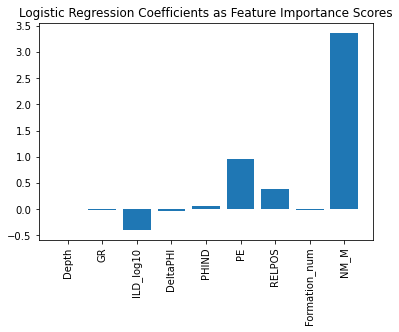

In [55]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define dataset
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i], v))
    
# plot feature importance
pyplot.bar([X.columns[i] for i in range(len(importance))], importance)
pyplot.xticks(rotation='vertical')
pyplot.title('Logistic Regression Coefficients as Feature Importance Scores')
pyplot.savefig('reg_importance.png')
pyplot.show()

Decision tree provides importance scores based on the reduction in the criterion used to split in each node such as entropy or Gini.

Feature: Depth, Score: 0.16984
Feature: GR, Score: 0.10744
Feature: ILD_log10, Score: 0.12113
Feature: DeltaPHI, Score: 0.07398
Feature: PHIND, Score: 0.11279
Feature: PE, Score: 0.08392
Feature: NM_M, Score: 0.17130
Feature: RELPOS, Score: 0.11010
Feature: Formation_num, Score: 0.04948


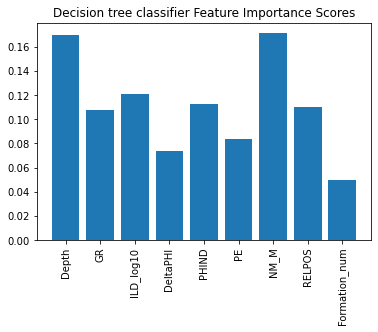

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)

# get importance

importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i], v))
    
# plot feature importance
pyplot.xticks(rotation='vertical')
pyplot.bar([X.columns[i] for i in range(len(importance))], importance)
pyplot.title('Decision tree classifier Feature Importance Scores')
pyplot.savefig('DTree.png')
pyplot.show()

XGBoost is a library that provides an efficient and effective implementation of the stochastic gradient boosting algorithm. This algorithm can be used with scikit-learn via the XGBRegressor and [**XGBClassifier**](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier) classes.

Feature: Depth, Score: 0.03277
Feature: GR, Score: 0.03301
Feature: ILD_log10, Score: 0.02749
Feature: DeltaPHI, Score: 0.02402
Feature: PHIND, Score: 0.03812
Feature: PE, Score: 0.03737
Feature: NM_M, Score: 0.72589
Feature: RELPOS, Score: 0.02808
Feature: Formation_num, Score: 0.05326


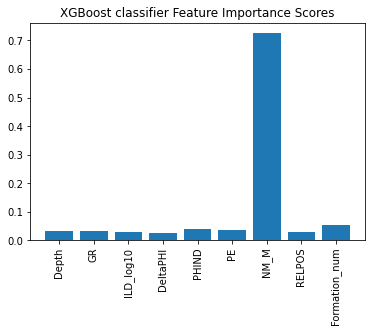

In [41]:
#pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i], v))

# plot feature importance
pyplot.xticks(rotation='vertical')
pyplot.bar([X.columns[i] for i in range(len(importance))], importance)
pyplot.title('XGBoost classifier Feature Importance Scores')
pyplot.show()

<a id='sect1_6'></a>
### <font color='darkgreen'>Permutation feature importance</font>
**[Permutation feature importance](https://scikit-learn.org/stable/modules/permutation_importance.html) is a model inspection technique that can be used for any fitted estimator when the data is tabular.** This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled.

Feature: Depth, Score: -0.00251
Feature: GR, Score: 0.02834
Feature: ILD_log10, Score: 0.04719
Feature: DeltaPHI, Score: 0.03316
Feature: PHIND, Score: 0.11482
Feature: PE, Score: 0.07934
Feature: NM_M, Score: 0.27419
Feature: RELPOS, Score: 0.03066
Feature: Formation_num, Score: 0.03128


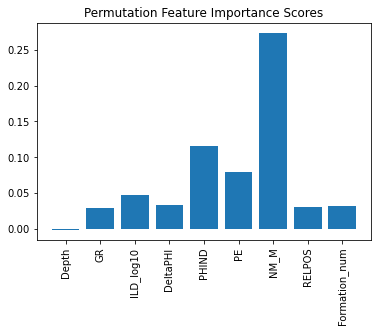

In [42]:
from sklearn.inspection import permutation_importance
model = LogisticRegression(solver='liblinear')

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i] ,v))

# plot feature importance
pyplot.xticks(rotation='vertical')
pyplot.bar([X.columns[i] for i in range(len(importance))], importance)
pyplot.title('Permutation Feature Importance Scores')
pyplot.savefig('permu.png')
pyplot.show()

In all these feature importance plots we can see that predictor number `NM_M` has the most importance in label prediction. Based on the model that we select to evaluate the result, we may choose features based on their importance and neglect the rest to speed up the training process. This is very common if we are rich in feature quantity, though in our example dataset here, we will use all features as predictors are limited.

## <font color='darkblue'>Summary</font>
**Data preparation** is one of the most important and time-consuming steps in machine learning. **Data visualization** can help us to understand data nature, borders, and distribution. **Feature engineering** is required especially if we have null and categorical values. In small datasets, **feature extraction** and **oversampling** can be helpful for model performances. Finally, we can analyze features in the dataset to see the importance of features for different model algorithms.